In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0), (1.0, 0.1), (1.0, 1.0), (0.1, 0.1)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_sigmoid_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'coef0', 'gamma', 'f1', 'features', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,coef0,gamma,f1,features,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
18,100.00,0.01,0.01,0.597822,pca_gdf_que3,0.187440,0.189441,0.593591,11946,0.618821,0.195495,0.195552,0.597652,0.1,1.0
19,100.00,1.00,0.01,0.591535,pca_gdf_que3,0.178282,0.179336,0.589324,3879,0.549361,0.118270,0.118307,0.559121,0.1,1.0
19,100.00,1.00,0.01,0.583332,pca_gdf_que3,0.166296,0.166771,0.583197,3035,0.563325,0.106091,0.106093,0.553055,0.1,1.0
19,100.00,1.00,0.01,0.584574,pca_gdf_que3,0.163482,0.164974,0.582032,7858,0.565646,0.161541,0.161559,0.580823,0.1,1.0
19,100.00,1.00,0.01,0.608775,pca_gdf_que3,0.159451,0.159953,0.579685,4320,0.593555,0.153315,0.153349,0.576739,0.1,1.0
19,100.00,1.00,0.01,0.582711,pca_gdf_que3,0.155069,0.157064,0.577828,12417,0.595457,0.163445,0.164187,0.581820,0.1,1.0
18,100.00,0.01,0.01,0.608539,pca_gdf_que3,0.153971,0.155409,0.576756,10484,0.557702,0.107408,0.107635,0.553782,0.1,1.0
19,100.00,1.00,0.01,0.574872,pca_gdf_que3,0.151757,0.154633,0.576076,1472,0.615590,0.125834,0.126580,0.562447,0.1,1.0
19,100.00,1.00,0.01,0.571336,pca_gdf_que3,0.150470,0.153396,0.575605,9761,0.602111,0.130744,0.132352,0.565245,0.1,1.0
18,100.00,0.01,0.01,0.597229,pca_gdf_que3,0.149919,0.153391,0.575070,1956,0.588180,0.128929,0.129916,0.564492,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = [ 'features', 'matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log',
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock', 
               'f1_svm', 'f1_log', 'test_f1_svm', 'test_f1_log', ]
df_all[all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,pca_gdf_que3,0.189441,0.186824,0.195552,0.203627,0.593591,0.592373,0.597652,0.601087,11946,0.597822,0.595737,0.618821,0.634056
1,pca_gdf_que3,0.179336,0.178656,0.118307,0.120812,0.589324,0.588843,0.559121,0.560288,3879,0.591535,0.589258,0.549361,0.571568
2,pca_gdf_que3,0.166771,0.167115,0.106093,0.099310,0.583197,0.583085,0.553055,0.549537,3035,0.583332,0.588506,0.563325,0.572109
3,pca_gdf_que3,0.164974,0.146384,0.161559,0.171235,0.582032,0.572852,0.580823,0.584512,7858,0.584574,0.551977,0.565646,0.539665
4,pca_gdf_que3,0.159953,0.156657,0.153349,0.163789,0.579685,0.577752,0.576739,0.581178,4320,0.608775,0.610483,0.593555,0.620721
5,pca_gdf_que3,0.157064,0.150172,0.164187,0.154446,0.577828,0.573432,0.581820,0.576707,12417,0.582711,0.591476,0.595457,0.596958
6,pca_gdf_que3,0.155409,0.158982,0.107635,0.103611,0.576756,0.578350,0.553782,0.551208,10484,0.608539,0.611770,0.557702,0.577194
7,pca_gdf_que3,0.154633,0.148600,0.126580,0.118223,0.576076,0.572888,0.562447,0.557251,1472,0.574872,0.583823,0.615590,0.627148
8,pca_gdf_que3,0.153396,0.144700,0.132352,0.132214,0.575605,0.571695,0.565245,0.564652,9761,0.571336,0.593399,0.602111,0.609361
9,pca_gdf_que3,0.153391,0.152838,0.129916,0.133788,0.575070,0.574598,0.564492,0.566273,1956,0.597229,0.598501,0.588180,0.592871


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

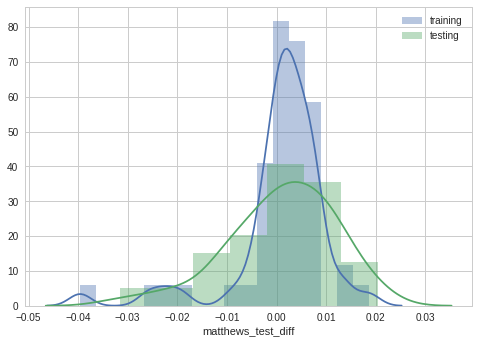

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

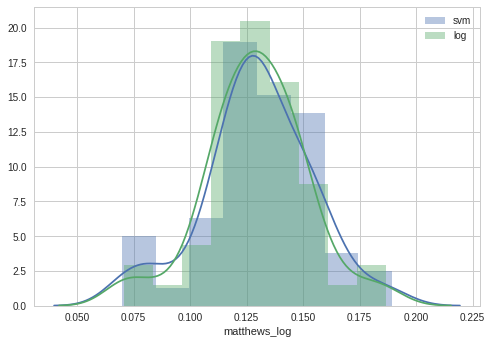

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.04301309020112719, 0.050014930432522337)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(38, 34, 53)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,pca_gdf_que3,0.189441,0.186824,0.195552,0.203627,0.593591,0.592373,0.597652,0.601087,11946,0.597822,0.595737,0.618821,0.634056
1,pca_gdf_que3,0.179336,0.178656,0.118307,0.120812,0.589324,0.588843,0.559121,0.560288,3879,0.591535,0.589258,0.549361,0.571568
3,pca_gdf_que3,0.164974,0.146384,0.161559,0.171235,0.582032,0.572852,0.580823,0.584512,7858,0.584574,0.551977,0.565646,0.539665
4,pca_gdf_que3,0.159953,0.156657,0.153349,0.163789,0.579685,0.577752,0.576739,0.581178,4320,0.608775,0.610483,0.593555,0.620721
9,pca_gdf_que3,0.153391,0.152838,0.129916,0.133788,0.575070,0.574598,0.564492,0.566273,1956,0.597229,0.598501,0.588180,0.592871
12,pca_gdf_que3,0.145867,0.142499,0.157113,0.162155,0.572370,0.570582,0.578556,0.580693,10508,0.567474,0.582458,0.568648,0.595089
14,pca_gdf_que3,0.145625,0.142170,0.128366,0.130087,0.572331,0.570308,0.563616,0.562736,12255,0.556238,0.561546,0.591378,0.614298
17,pca_gdf_que3,0.137910,0.136666,0.086544,0.096997,0.568275,0.567394,0.543245,0.547942,4060,0.579321,0.592910,0.527461,0.573308
18,pca_gdf_que3,0.135393,0.131165,0.111598,0.122536,0.567393,0.564884,0.555281,0.558425,8080,0.582311,0.586041,0.595881,0.629472
23,pca_gdf_que3,0.131258,0.125634,0.130403,0.162023,0.565470,0.562340,0.564684,0.580890,2651,0.560510,0.553881,0.538827,0.597790


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(37, 35, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,pca_gdf_que3,0.189441,0.186824,0.195552,0.203627,0.593591,0.592373,0.597652,0.601087,11946,0.597822,0.595737,0.618821,0.634056
1,pca_gdf_que3,0.179336,0.178656,0.118307,0.120812,0.589324,0.588843,0.559121,0.560288,3879,0.591535,0.589258,0.549361,0.571568
3,pca_gdf_que3,0.164974,0.146384,0.161559,0.171235,0.582032,0.572852,0.580823,0.584512,7858,0.584574,0.551977,0.565646,0.539665
4,pca_gdf_que3,0.159953,0.156657,0.153349,0.163789,0.579685,0.577752,0.576739,0.581178,4320,0.608775,0.610483,0.593555,0.620721
9,pca_gdf_que3,0.153391,0.152838,0.129916,0.133788,0.575070,0.574598,0.564492,0.566273,1956,0.597229,0.598501,0.588180,0.592871
12,pca_gdf_que3,0.145867,0.142499,0.157113,0.162155,0.572370,0.570582,0.578556,0.580693,10508,0.567474,0.582458,0.568648,0.595089
14,pca_gdf_que3,0.145625,0.142170,0.128366,0.130087,0.572331,0.570308,0.563616,0.562736,12255,0.556238,0.561546,0.591378,0.614298
17,pca_gdf_que3,0.137910,0.136666,0.086544,0.096997,0.568275,0.567394,0.543245,0.547942,4060,0.579321,0.592910,0.527461,0.573308
18,pca_gdf_que3,0.135393,0.131165,0.111598,0.122536,0.567393,0.564884,0.555281,0.558425,8080,0.582311,0.586041,0.595881,0.629472
23,pca_gdf_que3,0.131258,0.125634,0.130403,0.162023,0.565470,0.562340,0.564684,0.580890,2651,0.560510,0.553881,0.538827,0.597790


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,features,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock,f1_svm,f1_log,test_f1_svm,test_f1_log
0,pca_gdf_que3,0.189441,0.186824,0.195552,0.203627,0.593591,0.592373,0.597652,0.601087,11946,0.597822,0.595737,0.618821,0.634056
1,pca_gdf_que3,0.179336,0.178656,0.118307,0.120812,0.589324,0.588843,0.559121,0.560288,3879,0.591535,0.589258,0.549361,0.571568
3,pca_gdf_que3,0.164974,0.146384,0.161559,0.171235,0.582032,0.572852,0.580823,0.584512,7858,0.584574,0.551977,0.565646,0.539665
4,pca_gdf_que3,0.159953,0.156657,0.153349,0.163789,0.579685,0.577752,0.576739,0.581178,4320,0.608775,0.610483,0.593555,0.620721
9,pca_gdf_que3,0.153391,0.152838,0.129916,0.133788,0.575070,0.574598,0.564492,0.566273,1956,0.597229,0.598501,0.588180,0.592871
12,pca_gdf_que3,0.145867,0.142499,0.157113,0.162155,0.572370,0.570582,0.578556,0.580693,10508,0.567474,0.582458,0.568648,0.595089
17,pca_gdf_que3,0.137910,0.136666,0.086544,0.096997,0.568275,0.567394,0.543245,0.547942,4060,0.579321,0.592910,0.527461,0.573308
18,pca_gdf_que3,0.135393,0.131165,0.111598,0.122536,0.567393,0.564884,0.555281,0.558425,8080,0.582311,0.586041,0.595881,0.629472
23,pca_gdf_que3,0.131258,0.125634,0.130403,0.162023,0.565470,0.562340,0.564684,0.580890,2651,0.560510,0.553881,0.538827,0.597790
28,pca_gdf_que3,0.128678,0.130301,0.142511,0.146515,0.564063,0.564461,0.570695,0.573201,1113,0.549809,0.534083,0.604995,0.591563
